# MolSSI Workshop
## Introduction

This lesson covers Python basics like variable creation and assignment and using Jupyter notebook

In [1]:
3 + 7

10

In [8]:
deltaH = -541.5   #kJ/mole
deltaS = 10.4   #kJ/(mole K)
temp = 298   #kelvin
deltaG = deltaH - temp*deltaS
print(deltaG)
deltaG_joules = deltaG * 1000
print(deltaG_joules)

# I can assign all these variables at once
deltaH, deltaS, temp = -541.5, 10.4, 298
deltaG = deltaH - temp * deltaS
print(deltaG)
type(deltaG)
deltaG_string = str(deltaG)
type(deltaG_string)

-3640.7000000000003
-3640700.0000000005
-3640.7000000000003


str

In [17]:
# This is a list
energy_kcal = [-13.4, -2.7, 5.4, 42.1]
# I can determine its length
energy_length = len(energy_kcal)

# print the list length
print('The legth of this list is', energy_length)

# Print the first element of the list
print(energy_kcal[0])

#Convert the second list element to kilojoules.
energy_kilojoules = energy_kcal[1] * 4.184
print(energy_kilojoules)

The legth of this list is 4
-13.4
-11.296800000000001


In [20]:
short_list = energy_kcal[0:2]
print(short_list)

print(energy_kcal)
energy_kcal[0:2]
print(energy_kcal)

[-13.4, -2.7]
[-13.4, -2.7, 5.4, 42.1]
[-13.4, -2.7, 5.4, 42.1]


In [28]:
# for loops
energy_kJ = []
for number in energy_kcal:
    kJ = number * 4.184
    energy_kJ.append(kJ)

print(energy_kJ)

negative_energy_kJ = []
for number in energy_kJ:
    if number < 0:
        negative_energy_kJ.append(number)
        
print('The list with negative energies is:',negative_energy_kJ)


[-56.0656, -11.296800000000001, 22.593600000000002, 176.1464]
The list with negative energies is: [-56.0656, -11.296800000000001]


In [34]:
data_list = ['-12.5', 14.4, 8.1, '42']

number_list = []
for item in data_list:
    if type(item) is str:
        item = float(item)
    number_list.append(item)
    
print(number_list)

[-12.5, 14.4, 8.1, 42.0]


In [3]:
ls 

 03_Prod.mdout   buckminsterfullerene.xyz   'MolSSI Workshop.ipynb'   sapt.out
 benzene.xyz     distance_data_headers.csv   outfiles/                water.xyz


In [10]:
pwd


'/home/lucasw/Disciplinas/Python/cms-workshop'

In [30]:
import os

ethanol_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'outfiles', 'ethanol.out')

# Opening the file
with open(ethanol_file, 'r') as outfile:
    data = outfile.readlines()

for line in data:
    if 'Final Energy' in line:
        energy_line = line
        print(energy_line)
        
words = energy_line.split()
print(words)
energy = float(word[3])
print(type(energy))
energy + 50

  @DF-RHF Final Energy:  -154.09130176573018

['@DF-RHF', 'Final', 'Energy:', '-154.09130176573018']
<class 'float'>


-104.09130176573018

In [50]:
sapt_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'sapt.out')

# Opening the SAPT calculation output between the ethene-ethyne complex:
with open(sapt_file, 'r') as outfile:
    sapt_data = outfile.readlines()
    
for line in sapt_data:
    if 'Electrostatics    ' in line:
        electrostatics = line
    elif 'Exchange   ' in line:
        exchange = line
    elif 'Induction  ' in line:
        induction = line
    elif 'Dispersion   ' in line:
        dispersion = line
        
Electro = electrostatics.split()
Electrostatics = float(Electro[3])
Exc = exchange.split()
Exchange = float(Exc[3])
Ind = induction.split()
Induction = float(Ind[3])
Disp = dispersion.split()
Dispersion = float(Disp[3])
Total = Electrostatics + Exchange + Induction + Dispersion

# Printing the results:
print('Electrostatics :', Electrostatics, 'kcal/mol\n'
'Exchange :', Exchange, 'kcal/mol\n'
'Induction :', Induction, 'kcal/mol\n'
'Dispersion :', Dispersion, 'kcal/mol\n'
'Total Energy :', Total, 'kcal/mol\n'
)

Electrostatics : -2.25850118 kcal/mol
Exchange : 2.27730198 kcal/mol
Induction : -0.5216933 kcal/mol
Dispersion : -0.9446677 kcal/mol
Total Energy : -1.4475602000000003 kcal/mol



In [22]:
# Processing Multiple Files and Writing Files Lesson

import os
import glob

file_location = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'outfiles', "*.out")
print(file_location)

filenames = glob.glob(file_location)
print(filenames)
print()
for f in filenames:
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(energy)
print()
            
# Alternative way to open files
for f in filenames:
    with open(f, 'r') as outfiles:
        data = outfiles.readlines()
        for line in data:
            if 'Final Energy' in line:
                energy_line = line
                words = energy_line.split()
                energy = float(words[3])
                print(energy)
print()                


first_file = filenames[0]
print(first_file)

file_name = os.path.basename(first_file)
print(file_name)

file_name_split = file_name.split('.')
name = file_name_split[0]
print(name)
print()
print()


# Alternative for loops to include file name
for f in filenames:
    # Get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    # Read the data
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    
    # Loop through the data
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(molecule_name, energy)

print()

# Another alternative way for loops to include file name
for f in filenames:
    file_name = os.path.basename(f)
    split_file_name = file_name.split('.')
    molecule_name = split_file_name[0]
    with open(f, 'r') as outfiles:
        data = outfiles.readlines()
        for line in data:
            if 'Final Energy' in line:
                energy_line = line
                words = energy_line.split()
                energy = float(words[3])
                print(molecule_name, energy)
                
print()

# Writing the files opening it
datafile = open('energies.txt', 'w+')

for f in filenames:
    # Get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    # Read the data
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    
    # Loop through the data
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            # Wrinting the files separated by a TAB
            datafile.write(F'{molecule_name} \t {energy} \n')
datafile.close()

# Alternative way to write data!!!
with open('energies_alt.txt', 'w+') as datafile:
    
    for f in filenames:
        # Get the molecule name
        file_name = os.path.basename(f)
        split_filename = file_name.split('.')
        molecule_name = split_filename[0]
        
        # Read the data
        outfile = open(f, 'r')
        data = outfile.readlines()
        outfile.close()
        
        # Loop through the data
        for line in data:
            if 'Final Energy' in line:
                energy_line = line
                words = energy_line.split()
                energy = float(words[3])
                # Wrinting the files separated by a TAB
                datafile.write(F'{molecule_name} \t {energy} \n')


/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/*.out
['/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/ethanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/hexanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/pentanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/octanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/propanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/heptanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/methanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/decanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/nonanol.out', '/home/lucasw/Disciplinas/Python/cms-workshop/outfiles/butanol.out']

-154.09130176573018
-310.2385332251633
-271.20138119895074
-388.3110864554743
-193.12836249728798
-349.27397687072676
-115.04800861868374
-466.3836241400086
-427.3465180082815
-232.1655798347283

-154.09130176573018
-310.2385332251633
-271.2013

# Working with Tabular Data

In [20]:
import os
import numpy

distance_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'distance_data_headers.csv')

distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(numpy.float)
small_data = data[0:10,0:3]
thr4_atp = data[:,1] # Every row, just the THR4_ATP column
avg_thr4_atp = numpy.mean(thr4_atp)
num_columns = len(headers)
for i in range(1,num_columns):
    column = data[:,i]
    avg_col = numpy.mean(column)
    print(F'{headers[i]} : {avg_col}')

THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435


#Plotting and Data Visualization

# Plotting and Data Visualization

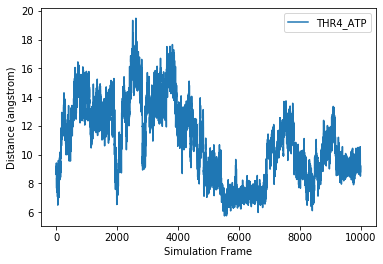

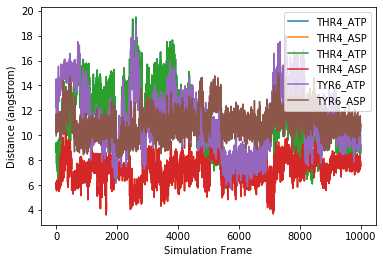

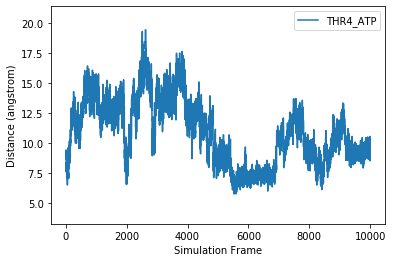

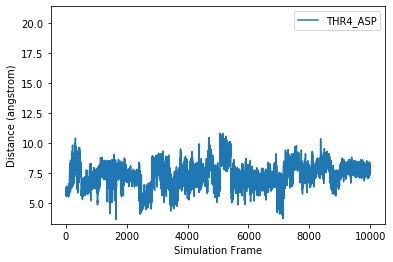

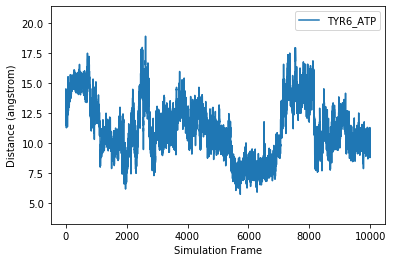

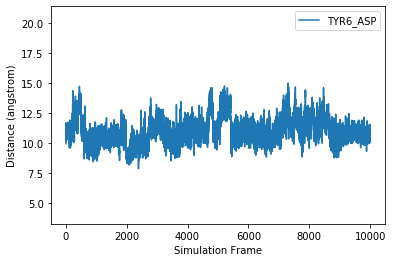

In [22]:
import os
import numpy as np
from matplotlib import pyplot as plt

distance_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'distance_data_headers.csv')
distances = np.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(np.float)

sample = headers[1]
plt.figure()  # This initialize a new figure
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()

plt.savefig(F'{sample}.png', dpi=300)


# Two graphs in one:
plt.figure()  # This initialize a new figure
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png', dpi=300)

# All graphs in one figure:
for col in range(1, len(headers)):
    fig = plt.plot(data[:,col], label=headers[col])
    plt.legend()
plt.xlabel('Simulation Frame')    
plt.ylabel('Distance (angstrom)')
plt.savefig('all_samples.png', dpi=300)

# Exercise with all graphs:
data_min = np.min(data[:,1:])*0.9
data_max = np.max(data[:,1])*1.1

for col in range(1, len(headers)):
    plt.figure()
    fig = plt.plot(data[:, col], label=headers[col])
    plt.legend()
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.ylim(data_min, data_max)
    plt.savefig(F'{headers[col]}.png', dpi=300)

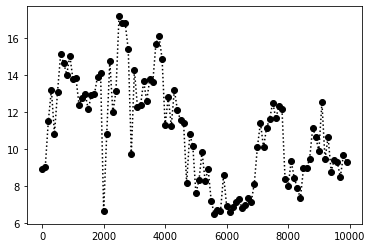

In [51]:
import os
import numpy as np
from matplotlib import pyplot as plt

distance_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'distance_data_headers.csv')
distances = np.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(np.float)

plt.figure()
plt.plot(data[0::100, 0], data[0::100, 1], ':o', color='black')

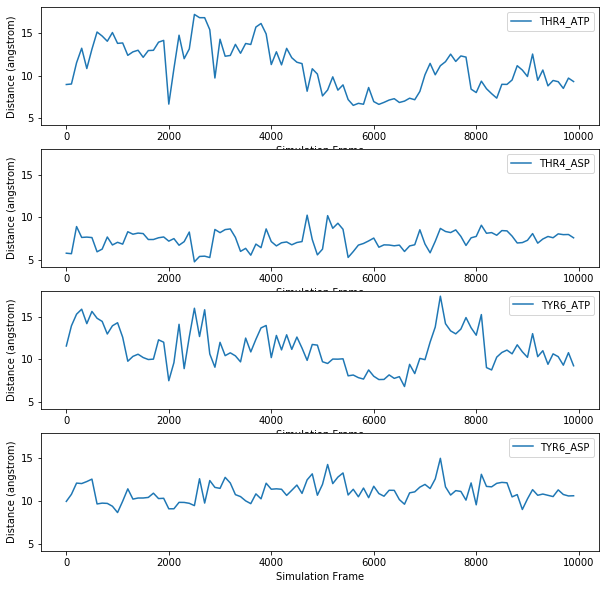

In [64]:
import os
import numpy as np
from matplotlib import pyplot as plt

distance_file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'distance_data_headers.csv')
distances = np.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(np.float)

fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10,10), sharey=True)  
for col in range(1, len(headers)):
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('Simulation Frame')
    ax[col-1].set_ylabel('Distance (angstrom)')
    ax[col-1].legend()

# Writing Functions

In [4]:
import os
import numpy as np

# Defining the file path
file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'water.xyz')

# Opening the water.xyz file as a numpy array
water_xyz = np.genfromtxt(fname=file, dtype='unicode', skip_header=2)
symbols = water_xyz[:,0] # Atom symbols
water_coordinates = water_xyz[:,1:]  # defining the molecular coordinates without the number of atoms and title
water_coordinates = water_coordinates.astype(np.float)

num_atoms = len(symbols)

def calculate_distance(atom1_coord, atom2_coord):  
    """Calculate the distance between two three-dimensional points."""
    x_distance = atom1_coord[0] - atom2_coord[0]    
    y_distance = atom1_coord[1] - atom2_coord[1]   
    z_distance = atom1_coord[2] - atom2_coord[2]
    bond_length_12 = np.sqrt(x_distance**2 + y_distance**2 + z_distance**2)
    return bond_length_12

for num1 in range(0, num_atoms):
    for num2 in range(0, num_atoms):
        if num1 < num2:
            bond_length_12 = calculate_distance(water_coordinates[num1], water_coordinates[num2])
            if bond_length_12 > 0 and bond_length_12 <= 1.5:
                print(F'{symbols[num1]} to {symbols[num2]} : {bond_length_12:.3f}\n')
                
help(calculate_distance)

O to H1 : 0.969

O to H2 : 0.969

Help on function calculate_distance in module __main__:

calculate_distance(atom1_coord, atom2_coord)
    Calculate the distance between two three-dimensional points.



In [7]:
# Exercise: defining the open_xyz function

import os
import numpy as np

# Defining the file path
file = os.path.join('/home/lucasw/Disciplinas/Python/cms-workshop', 'water.xyz')

# Defining the open_xyz function
def open_xyz(xyz):
    """
    Opens a xyz of a molecule and converts it into a  numpy array to data manipulation
    """
    molecule_xyz = np.genfromtxt(fname=xyz, dtype='unicode', skip_header=2)
    molecule_symbols = molecule_xyz[:,0]
    molecule_coordinates = molecule_xyz[:,1:]
    molecule_coordinates = molecule_coordinates.astype(np.float)
    return molecule_symbols, molecule_coordinates

help(open_xyz)

water_xyz = open_xyz(file)
print(water_xyz)

Help on function open_xyz in module __main__:

open_xyz(xyz)
    Opens a xyz of a molecule and converts it into a  numpy array to data manipulation

(array(['O', 'H1', 'H2'], dtype='<U9'), array([[ 0.      , -0.007156,  0.965491],
       [-0.      ,  0.001486, -0.003471],
       [ 0.      ,  0.931026,  1.207929]]))
